# Analyse du jeu de données

In [17]:
from utils import get_new_dataframe

import os
import pandas as pd
import s3fs
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [18]:
#Récupération du jeu de données afin d'effectuer des analyses
df = get_new_dataframe()
df

,text,label,src
0,Little disclaimer: this deals with US laws and...,1,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human
...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human


In [19]:
# Le nombre de sortie attendue possible
df["label"].unique()

array([1, 0])

In [20]:
# Les données générées par des humains
df[df["label"] == 1]

,text,label,src
0,Little disclaimer: this deals with US laws and...,1,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human
...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human


In [21]:
# Les données générées par une intelligence artificielle
df[df["label"] == 0]

,text,label,src
812,Little disclaimer: this deals with US laws and...,0,cmv_machine_continuation_t0_11b
813,I'm posting this hoping that someone will poin...,0,cmv_machine_continuation_t0_11b
814,"Read: Mentally Retarded Downs. See, we've got ...",0,cmv_machine_continuation_t0_11b
815,"If any of you frequent rbadhistory, there is a...",0,cmv_machine_continuation_t0_11b
816,WARNING: WALL OF TEXT!!! I also jump from topi...,0,cmv_machine_continuation_t0_11b
...,...,...,...
28885,We consider a wireless distributed computing s...,0,sci_gen_machine_continuation_opt_2.7b
28886,We study the problem of learning a real-valued...,0,sci_gen_machine_continuation_opt_2.7b
28887,Internet of Things (IoT) is the next big evolu...,0,sci_gen_machine_continuation_opt_2.7b
28888,This paper introduces the notion of exact comm...,0,sci_gen_machine_continuation_opt_2.7b


## Liste des analyses effectuées:
 1. Graphique (pie chart) qui montre le nombre de réponses par source 

 2. Graphique (bar chart) qui montre le pourcentage de réponses humaines et non humaines

 3. Graphique (bar chart) qui montre le nombre moyen de mots par humain et AI 

 4. Étude de la corrélation entre le label et la source 
 
 5. Nuage de mots pour les textes générés par des humains et l'intelligence artificielle pour visualiser
     les mots les plus fréquents pour chaque catégorie

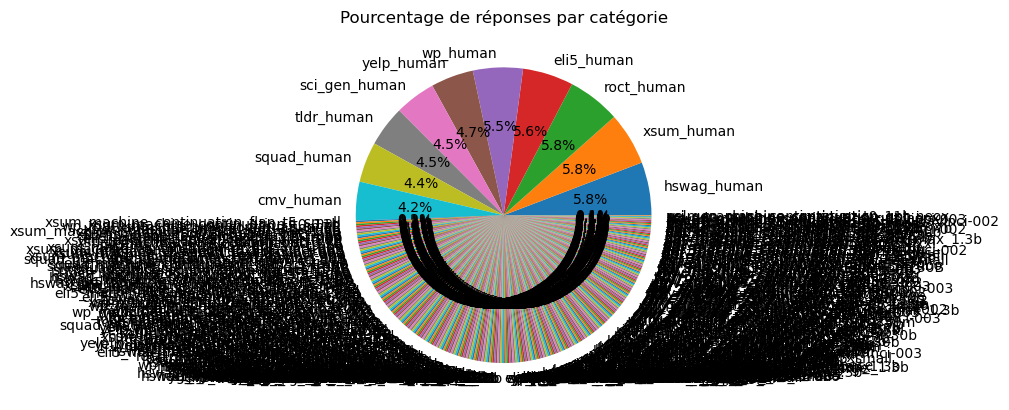

In [22]:
# Graphique (pie chart) qui montre le nombre de réponses par source
# Il y a beaucoup de sources avec peu de données, ce qui rend le graphique illisible
count_per_src = df['src'].value_counts()

percentage_per_src = count_per_src / count_per_src.sum() * 100

plt.pie(percentage_per_src, labels=percentage_per_src.index, autopct='%1.1f%%')
plt.title('Pourcentage de réponses par catégorie')
plt.show()

In [23]:
human_sources = [
    'cmv_human', 'squad_human', 'tldr_human', 'sci_gen_human', 'yelp_human',
    'wp_human', 'eli5_human', 'roct_human', 'xsum_human', 'hswag_human'
]

df['source_graphique'] = df['src'].apply(lambda x: x if x in human_sources else 'autre_source')
df

,text,label,src,source_graphique
0,Little disclaimer: this deals with US laws and...,1,cmv_human,cmv_human
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human,cmv_human
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human,cmv_human
3,"I believe in a flat tax system, where everyone...",1,cmv_human,cmv_human
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human,cmv_human
...,...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human,sci_gen_human
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human,sci_gen_human
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human,sci_gen_human
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human,sci_gen_human


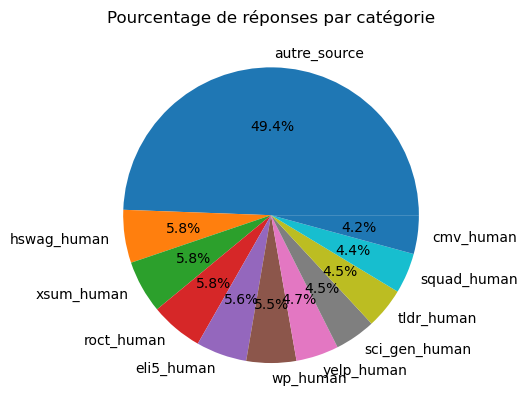

In [24]:
# On reproduit le même graphique (en les groupant)
count_per_src_graphique = df['source_graphique'].value_counts()

percentage_per_src_graphique = count_per_src_graphique / count_per_src_graphique.sum() * 100

plt.pie(percentage_per_src_graphique, labels=percentage_per_src_graphique.index, autopct='%1.1f%%')
plt.title('Pourcentage de réponses par catégorie')
plt.show()

/tmp/ipykernel_75375/220809761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["IA", "Humain"], y=count_per_label.values, palette='coolwarm', errorbar=None, width=0.5)


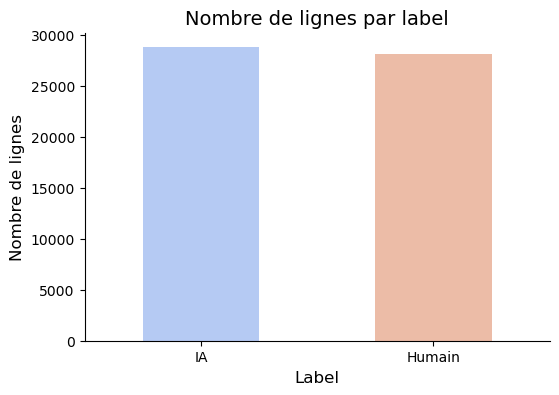

In [25]:
# Graphique (bar chart) qui montre le pourcentage de réponses humaines et non humaines:
# 1 c'est humain et 0 c'est IA

count_per_label = df['label'].value_counts()

plt.figure(figsize=(6, 4))  
sns.barplot(x=["IA", "Humain"], y=count_per_label.values, palette='coolwarm', errorbar=None, width=0.5)  
plt.xlabel('Label', fontsize=12)  
plt.ylabel('Nombre de lignes', fontsize=12)  
plt.title('Nombre de lignes par label', fontsize=14) 

sns.despine() 
plt.show()

In [26]:
# Graphique (bar chart) qui montre le nombre moyen de mots par humain et AI:
# Rajout d'une colonne avec le nombre de mots dans la colonne 'text' 

df['number_words'] = df['text'].apply(lambda x: len(x.split()))
df

,text,label,src,source_graphique,number_words
0,Little disclaimer: this deals with US laws and...,1,cmv_human,cmv_human,581
1,"Read: Mentally Retarded Downs. See, we've got ...",1,cmv_human,cmv_human,241
2,"If any of you frequent rbadhistory, there is a...",1,cmv_human,cmv_human,460
3,"I believe in a flat tax system, where everyone...",1,cmv_human,cmv_human,249
4,"Edit: Ok guy's, my views have been changed on ...",1,cmv_human,cmv_human,368
...,...,...,...,...,...
56814,We consider the recovery of a source term f (x...,1,sci_gen_human,sci_gen_human,137
56815,"Self-supervised learning (SlfSL), aiming at le...",1,sci_gen_human,sci_gen_human,210
56816,Recurrent neural networks (RNNs) have achieved...,1,sci_gen_human,sci_gen_human,143
56817,Deep reinforcement learning (DRL) is a booming...,1,sci_gen_human,sci_gen_human,185


/tmp/ipykernel_75375/3792973628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["IA","Humain"], y=mean_word_count_per_label.values, palette='viridis', errorbar=None, width=0.5)


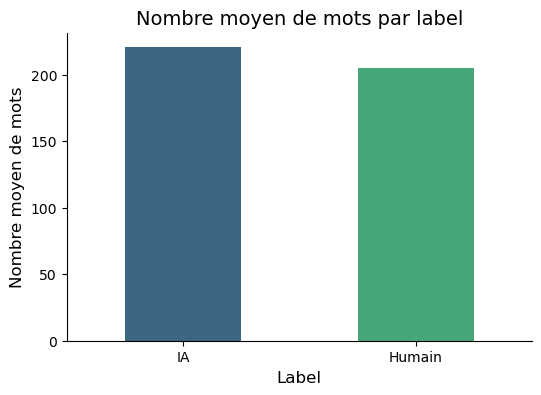

In [27]:
# Bar chart nombre de mots moyen pour humain et AI

mean_word_count_per_label = df.groupby('label')['number_words'].mean()

plt.figure(figsize=(6, 4)) 
sns.barplot(x=["IA","Humain"], y=mean_word_count_per_label.values, palette='viridis', errorbar=None, width=0.5)

plt.xlabel('Label', fontsize=12)  
plt.ylabel('Nombre moyen de mots', fontsize=12)  
plt.title('Nombre moyen de mots par label', fontsize=14)  

sns.despine()
plt.show()

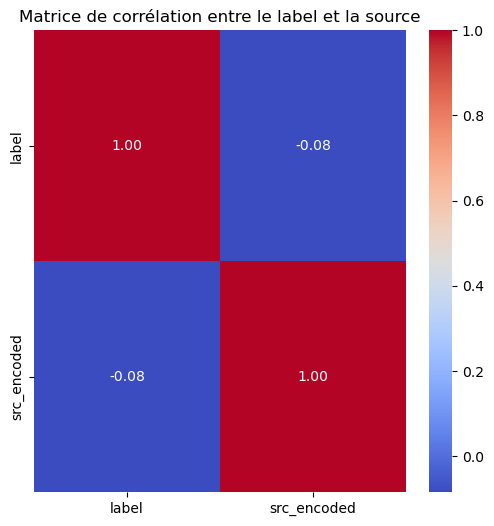

In [28]:
# Étude de la corrélation entre le label et la source :

le = LabelEncoder()
df['src_encoded'] = le.fit_transform(df['src'])

correlation_matrix = df[['label', 'src_encoded']].corr()


plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice de corrélation entre le label et la source')
plt.show()

In [29]:
!pip install wordcloud

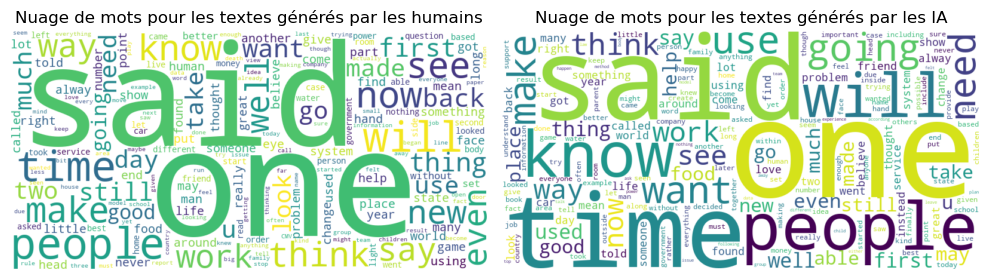

In [30]:
# Nuage de mots pour les textes générés:
from collections import Counter
from wordcloud import WordCloud

human_texts = ' '.join(df[df['label'] == 1]['text']) 
ai_texts = ' '.join(df[df['label'] == 0]['text'])  

human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_texts)
ai_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_texts)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les humains')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les IA')
plt.axis("off")

plt.tight_layout()
plt.show()